100% (180 of 180) |######################| Elapsed Time: 0:00:18 Time:  0:00:18
C:\Users\jaram\AppData\Local\Temp\ipykernel_10848\2934703208.py:35: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ModelGAM.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     41.0041
Link Function:                     IdentityLink Log Likelihood:                              -4577229.5865
Number of Samples:                          164 AIC:                                          9154543.1813
                                                AICc:                                         9154573.0393
                                                GCV:                                                   0.0
                                                Scale:                                                 0.0
                                                Pseudo R-Squared:                                   0.9999
Feature Function                  Lam

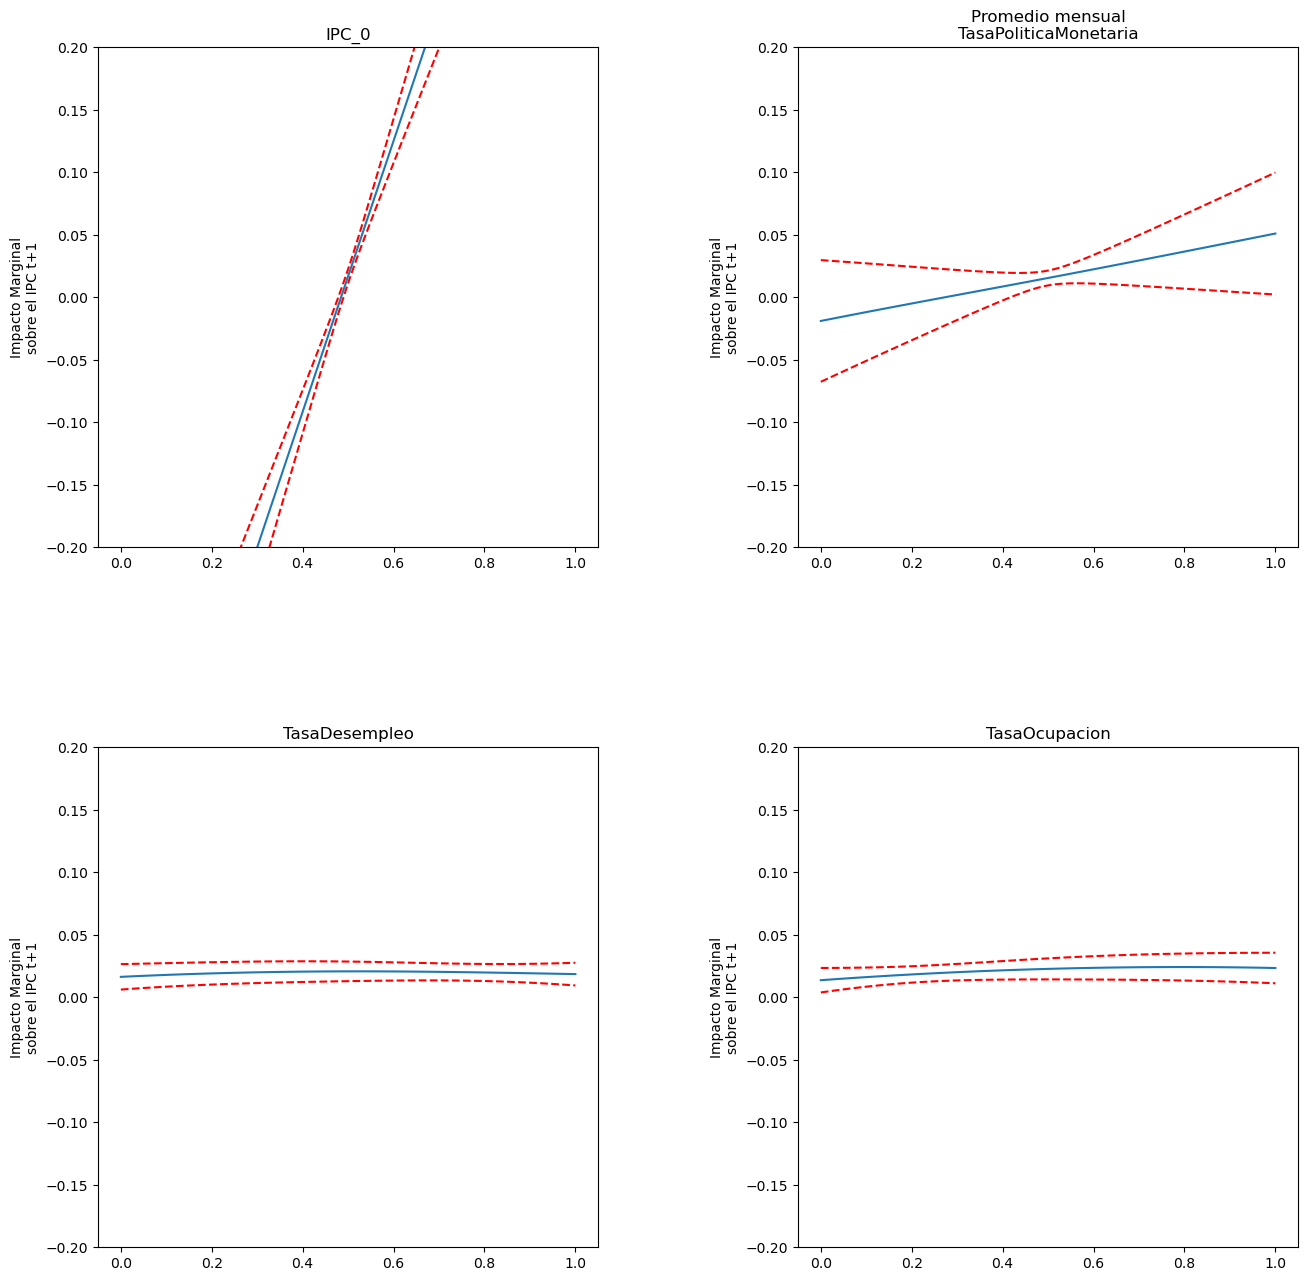

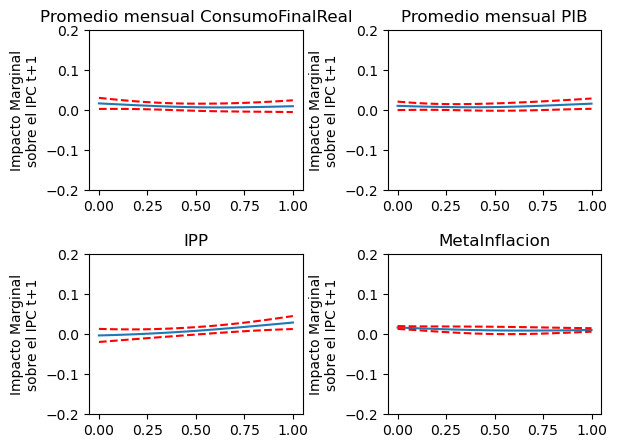

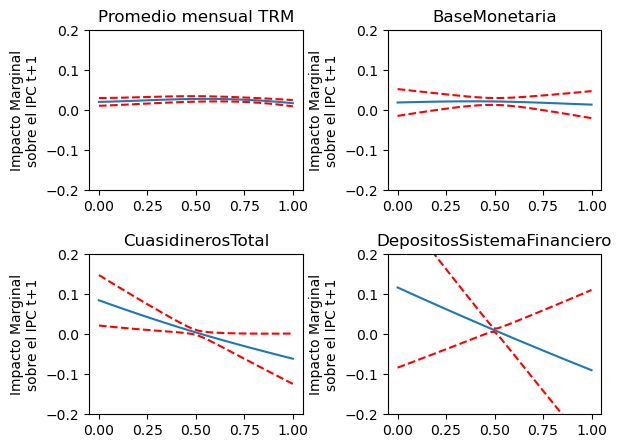

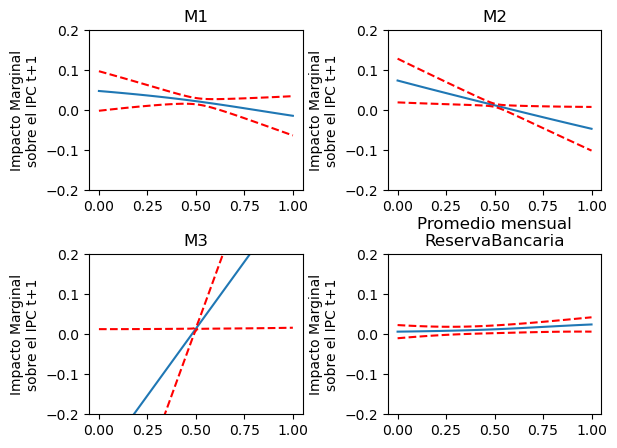

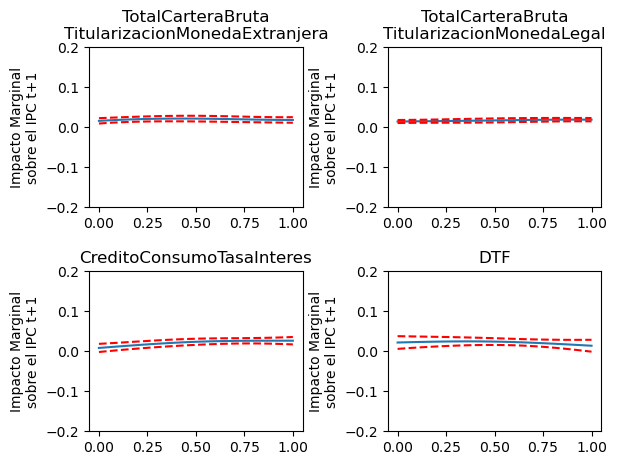

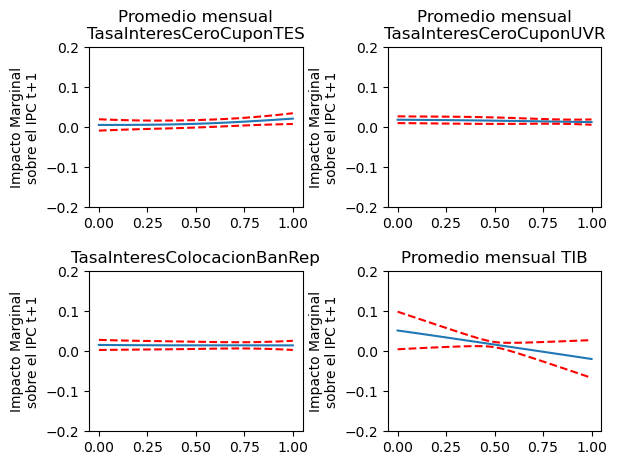

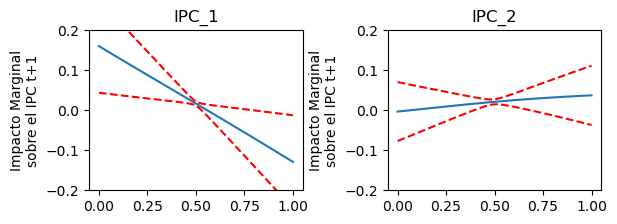

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pygam import LinearGAM
from sklearn.preprocessing import MinMaxScaler

FilesLocation = 'Data\\'

def DataImport(): 
    # Collect initial data
    globals()['Data'] = pd.read_csv(os.path.join(FilesLocation, 'TrainDataSet' + '.csv'), 
                                            sep=',',
                                            parse_dates=['Fecha'], 
                                            index_col=0, 
                                            decimal='.')
    
    globals()['XData'] = Data.drop(['IPC_Y','Inflaciontotal'], axis=1)
    globals()['YData'] = Data.filter(['IPC_Y'])

    #Scale
    Scaler = MinMaxScaler(feature_range=(0, 1))
    globals()['XDataScaled'] = pd.DataFrame(Scaler.fit_transform(XData),
                                                index=XData.index,
                                                columns=XData.columns)
    globals()['YDataScaled'] = pd.DataFrame(Scaler.fit_transform(YData),
                                                index=YData.index,
                                                columns=YData.columns)

def Model():
    lams = np.array([np.logspace(-5, 5, 30)] * 26).transpose()
    n_splines = range(0, 6)
    globals()['ModelGAM'] = LinearGAM().gridsearch(XDataScaled.values, YDataScaled.values, lam=lams, n_splines=n_splines)
    ModelGAM.summary()

    titles = XData.columns.values
    fig = plt.figure(figsize=(15, 15))
    j = 0

    for i in range(0,26):
        XX = ModelGAM.generate_X_grid(term=i)
        ax = plt.subplot(2, 2, j+1)
        ax.plot(XX[:, i], ModelGAM.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], ModelGAM.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        
        if titles[i] == 'Promedio mensual TasaPoliticaMonetaria':
            titles[i] = 'Promedio mensual\nTasaPoliticaMonetaria'
        elif titles[i] == 'Promedio mensual MetaInflacion':
            titles[i] = 'Promedio mensual\nMetaInflacion'
        elif titles[i] == 'Promedio mensual ReservaBancaria':
            titles[i] = 'Promedio mensual\nReservaBancaria'
        elif titles[i] == 'TotalCarteraBrutaTitularizacionMonedaExtranjera':
            titles[i] = 'TotalCarteraBruta\nTitularizacionMonedaExtranjera'
        elif titles[i] == 'TotalCarteraBrutaTitularizacionMonedaLegal':
            titles[i] = 'TotalCarteraBruta\nTitularizacionMonedaLegal'
        elif titles[i] == 'Promedio mensual TasaInteresCeroCuponTES':
            titles[i] = 'Promedio mensual\nTasaInteresCeroCuponTES'
        elif titles[i] == 'Promedio mensual TasaInteresCeroCuponUVR':
            titles[i] = 'Promedio mensual\nTasaInteresCeroCuponUVR'
        ax.set_title(titles[i])

        # ax.set_xlabel(DictTimeSerie['xLabel'])
        plt.ylim(-0.2, 0.2)
        ax.set_ylabel('Impacto Marginal\nsobre el IPC t+1')

        j += 1

        if i in list(range(0, 26, 4) - np.array([1] * 7)):
            plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.4)
            plt.show()
            j = 0

    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.show()

def FinalDatasetCreation():
    # Save Final Datasets
    FinalTrainDataSet = Data.filter(['IPC_0',
                                    'IPC_1',
                                    'IPC_2',
                                    'CuasidinerosTotal',
                                    'DepositosSistemaFinanciero',
                                    'M2',
                                    'M3',
                                    'IPC_Y'])
    
    TestDataSet = pd.read_csv(os.path.join(FilesLocation, 'TestDataSet' + '.csv'), 
                                            sep=',',
                                            parse_dates=['Fecha'], 
                                            index_col=0, 
                                            decimal='.')
 
    FinalTestDataSet = TestDataSet.filter(['IPC_0',
                                    'IPC_1',
                                    'IPC_2',
                                    'CuasidinerosTotal',
                                    'DepositosSistemaFinanciero',
                                    'M2',
                                    'M3',
                                    'IPC_Y'])

    FinalTrainDataSet.to_csv(os.path.join(FilesLocation, 'FinalTrainDataSet.csv'))
    FinalTestDataSet.to_csv(os.path.join(FilesLocation, 'FinalTestDataSet.csv'))

def run():
    DataImport()
    Model()
    FinalDatasetCreation()

if __name__ == '__main__':
    run()